# DS 3000 - Assignment 10

**Student Name**: David Yu

**Date**: 3/19/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

load the data directly from the URL into a DataFrame.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
url = "https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K"
df = pd.read_csv(url)

print(df.head())

   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0


## Question 2: (10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
- Perform EDA using the dataset to demonstrate patterns.
- Handle any missing data and invalid data. Justify your approach.
- Plot a histogram of the birth weight and explain the overall distribution. 


In [6]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values before cleaning:")
print(df.isna().sum())

df = df.replace("NA", np.nan)

# Convert all columns to appropriate data types
for col in df.columns:
    if col != 'case':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values after NA conversion:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe().round(2))

Dataset shape: (1236, 8)

First 5 rows:
   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0

Missing values before cleaning:
case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

Missing values after NA conversion:
case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

Summary statistics:
          case      bwt  gestation   parity      age   height   weight  \
count  1236.00  1236.00    1223.00  1236.00  1234.00  1214.00  1200.00   
mean    618.50   119.58     279.34     0.25    27.26    64.05   128.63   

In [ ]:
df_clean = df.copy()

# Impute missing values with median for each column
for col in df_clean.columns:
    if col != 'case' and df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

print("\nMissing values after imputation:")
print(df_clean.isna().sum())


Missing values after imputation:
case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64


### Handling Missing and Invalid Data
1. Identifying missing values that were represented as "NA" strings as proper null values. I converted all them to NaN. This allows use to standardize our representation of missing values and it allows for proper handling by pandas.
2. Imputing missing values with the median of each respective column. I chose to use medians because:
- Medians are less likely to be affected by extreme outliers, unlike means.
- Medians maintain the overall distribution shape of the data better than mode imputation.
3. Using panda's pd.to_numeric() with errors='coerce' parameter for any potential invalid data types. This will convert any non-numeric values to NaN and ensures consistent data types across all feature columns.

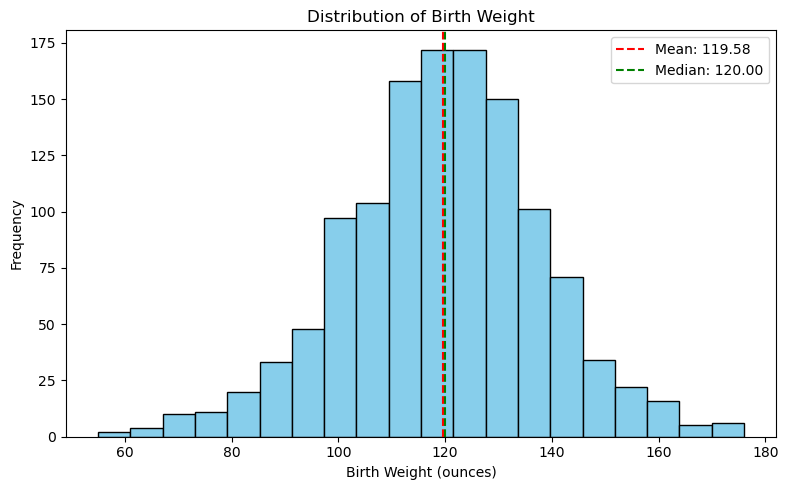

In [14]:
# Birth weight distribution
plt.figure(figsize=(8, 5))
plt.hist(df['bwt'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.axvline(df['bwt'].mean(), color='red', linestyle='--', label=f'Mean: {df["bwt"].mean():.2f}')
plt.axvline(df['bwt'].median(), color='green', linestyle='--', label=f'Median: {df["bwt"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

- Birth weights are approximately normally distributed. The mean of 119.58 ounces and the median of 120 ounces are very close to each other, showing that there is minimal skew.
- Most babies have a weight of 100 - 140 ounces, which is typical healthy birht weight for babies.
- Overall, this distribution reflects expected patterns of birth weights in a general population. There is no extremes or concerning outliers.

## Question 3: (5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected. Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
- Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
- Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
